In [1]:
import sys; sys.path.append('..')
import dgl
import torch
import pickle
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import cm
from src.trajnet.dataset import CFF6
from src.vgrnn.process import mask_edges_det
from src.trajnet.reader import Reader
plt.rcParams.update({
    'text.usetex': True,
})

### **VGRNN Facebook Dataset**
Dataset download link: `https://github.com/VGraphRNN/VGRNN/tree/master/data/fb`.

In [2]:
# Load data files
with open('../data/fb/adj_time_list.pickle', 'rb') as handle:
    adj_time_list = pickle.load(handle, encoding='latin1')
with open('../data/fb/adj_orig_dense_list.pickle', 'rb') as handle:
    adj_orig_dense_list = pickle.load(handle, encoding='bytes')

# Masking edges
outs = mask_edges_det(adj_time_list)
adj_train_l = outs[0]
train_edges_l = outs[1]
val_edges_l = outs[2]
val_edges_false_l = outs[3]
test_edges_l = outs[4]
test_edges_false_l = outs[5]

# Making edge list
edge_idx_list = []
for i in range(len(train_edges_l)):
    edge_idx_list.append(torch.tensor(np.transpose(train_edges_l[i]), dtype=torch.long))

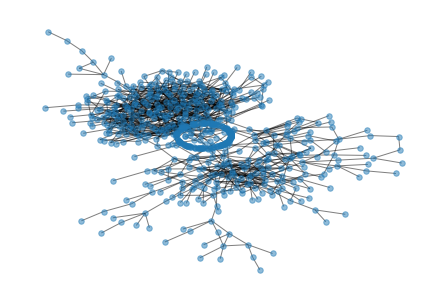

In [3]:
# Visualization
data = train_edges_l[1]
g = dgl.graph((data[:, 0], data[:, 1]))
nx_g = g.to_networkx().to_undirected() 
pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g, pos, with_labels=False, node_size=30, alpha=0.5)

### **TrajNet++ Dataset**
Dataset download link: `https://github.com/vita-epfl/trajnetplusplusdataset`.

In [5]:
# Load dataset file
reader = Reader('../data/cff/cff_06.ndjson', scene_type='paths')
print(f'Number of Frames: {len(reader.tracks_by_frame)}')
print(f'Number of Scenes: {len(reader.scenes_by_id)}')

Number of Frames: 17447
Number of Scenes: 23751


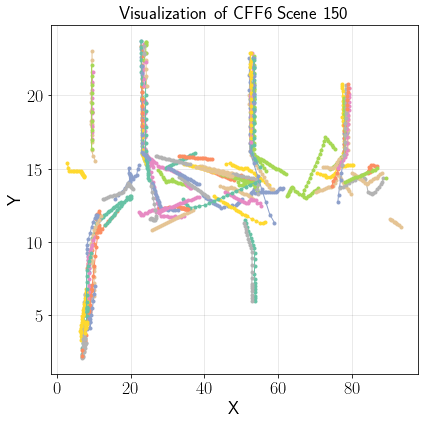

In [6]:
# Visualization of one scene
fig, axs = plt.subplots(1, figsize=(6, 6))
title_font = {'family': 'Arial Black', 'fontsize': 18, 'fontweight': 'bold'}
label_font = {'family': 'Arial Black', 'fontsize': 18}
legend_font = {'family': 'Palatino Linotype', 'size': 18}

scene_idx = 150
scene = reader.scene(scene_idx)[1]
for i in range(len(scene)):
    # For each pedestrain
    x_list = []
    y_list = []
    for j in range(len(scene[i])):
        x_list.append(scene[i][j][2])
        y_list.append(scene[i][j][3])
    axs.plot(x_list, y_list, label=f'Ped{i+1}', color=cm.Set2(i%8), marker='.', lw=1)

axs.set_xlabel('X', fontdict=label_font)
axs.set_ylabel('Y', fontdict=label_font)
axs.set_title(f'Visualization of CFF6 Scene {scene_idx}', fontdict=title_font)
axs.grid(axis='both', color='black', alpha=0.1)
axs.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y')
axs.tick_params(axis='both', which='major', labelsize=18)
labels = axs.get_xticklabels() + axs.get_yticklabels()
[label.set_fontname('serif') for label in labels]

plt.tight_layout()
plt.show()